# Video Games Sales Analysis


## Description

The data used was downloaded from <a href='https://www.kaggle.com/datasets/gregorut/videogamesales' >Kaggle</a>.<br>
It contains the following columns:


    1. Rank - This is based on the amount of global sales.
    2. Name - The name of the game.
    3. Platform - The gaming system it is created for.
    4. Year - The year it was released.
    5. Genre - The game's genre.
    6. Publisher - The  game's developing company.
    7. NA_Sales - Sales in North America.
    8. EU_Sales - Sales in Europe.
    9. JP_Sales - Sales in Japan.
    10. Other_Sales - Sales in the rest of the world.
    11. Global_Sales - Sales in the whole world combined.






## Data Cleaning

In [144]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [146]:
# creating a df
video_game_sales = pd.read_csv('/content/drive/MyDrive/Video Game Sales/vgsales.csv', index_col='Rank')

In [147]:
# previewing the df
video_game_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [148]:
# shape of the data
video_game_sales.shape

(16598, 10)

In [149]:
# description of the data
round(video_game_sales.describe(), 4)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.0000,16598.0000,16598.0000,16598.0000,16598.0000,16598.0000
mean,2006.4064,0.2647,0.1467,0.0778,0.0481,0.5374
std,5.8290,0.8167,0.5054,0.3093,0.1886,1.5550
min,1980.0000,0.0000,0.0000,0.0000,0.0000,0.0100
25%,2003.0000,0.0000,0.0000,0.0000,0.0000,0.0600
50%,2007.0000,0.0800,0.0200,0.0000,0.0100,0.1700
75%,2010.0000,0.2400,0.1100,0.0400,0.0400,0.4700
max,2020.0000,41.4900,29.0200,10.2200,10.5700,82.7400


In [150]:
# information about the df
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [151]:
# function to find missing values percentage and store in a df
def find_missing(df):
  missing_vals_df = pd.DataFrame(columns = ['Column', 'Length', 'Missing_Entries', 'Percentage_Missing'])
  for i, col in enumerate(df.columns, start=1):
    len_column = len(df[col])
    missing = df[col].isna().sum()
    missing_percentage = round(((missing / len_column) * 100), 2)
    holding_df = pd.DataFrame({'Column':col, 'Length':len_column, 'Missing_Entries':missing,
                               'Percentage_Missing':missing_percentage}, index=[i])

    missing_vals_df = pd.concat([missing_vals_df, holding_df])
    missing_vals_df = missing_vals_df.sort_values(by='Percentage_Missing', ascending=False)
  missing_vals_df = missing_vals_df[missing_vals_df['Missing_Entries'] > 0]
  return missing_vals_df



In [152]:
# checking for missing values
find_missing(video_game_sales)

,Column,Length,Missing_Entries,Percentage_Missing
3,Year,16598,271,1.63
5,Publisher,16598,58,0.35


Only two columns have missing values. The size of missing values is not very big and can be dropped.

In [153]:
# inspecting the missing values in Publisher column
video_game_sales[video_game_sales['Publisher'].isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43


Given that there are only 58 missing values, one can research about each entry and find the publisher then insert it into the df but for this project the columns with missing values will be dropped.

In [154]:
# dropping all missing values
video_game_sales.dropna(subset=['Publisher', 'Year'], inplace=True)


In [155]:
# reviewing the df
video_game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


The Year column is formatted as a float and changing it to datetime will result in a default January 1st assignemnt. I therefore changed it to Int as I need just the year for my analysis.

In [156]:
# changing data type
video_game_sales['Year'] = video_game_sales['Year'].astype('int64')

In [157]:
# checking for duplicates
video_game_sales.duplicated().sum()

0

There are no duplicates in the data

In [158]:
# Preview of the df
video_game_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Analysis

Using ChatGPT, I derived the following questions that will be answered using ths data:<br>






1. What are the top 10 best selling games globally?


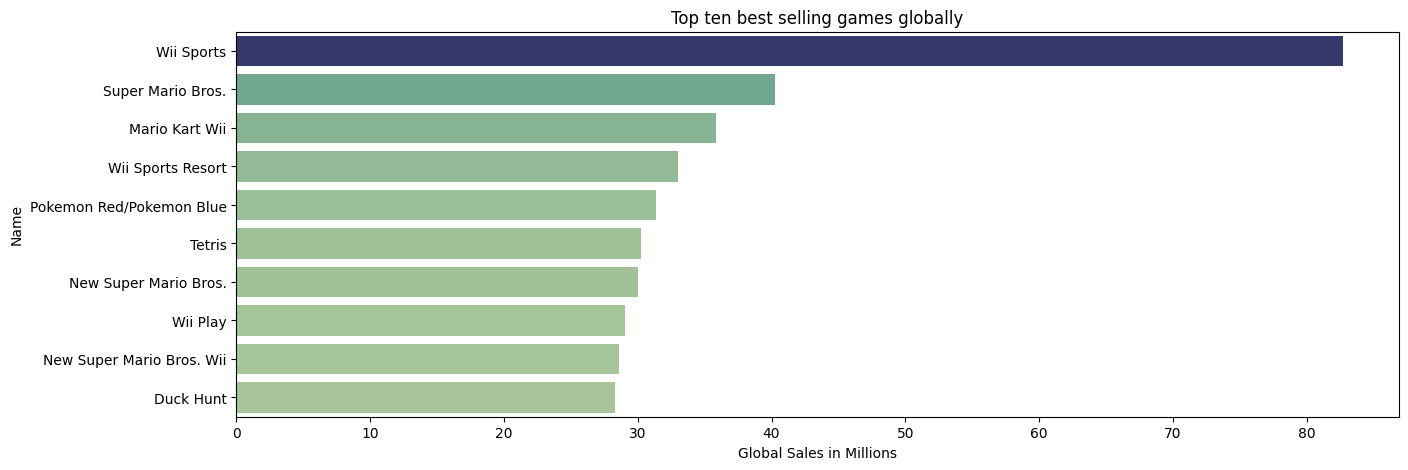

In [159]:
# the data was sorted by global sales although this will be verified below
sorted_df = video_game_sales.sort_values(by=['Global_Sales'], ascending=False)

# limiting to the top 10 entries
top_ten = sorted_df.head(10)

# plotting the top 10 selling games

plt.figure(figsize=(15,5))

sns.barplot(data=top_ten, x='Global_Sales', y='Name', hue='Global_Sales', orient='h', palette='crest', legend=False)
plt.xlabel('Global Sales in Millions')
plt.title('Top ten best selling games globally')


plt.show()




2.   Sales by Genre:
      - Which genre has the highest global sales?
      - How do sales of different genres compare in North America, Europe and Japan?

2. Which genre has the highest global sales?


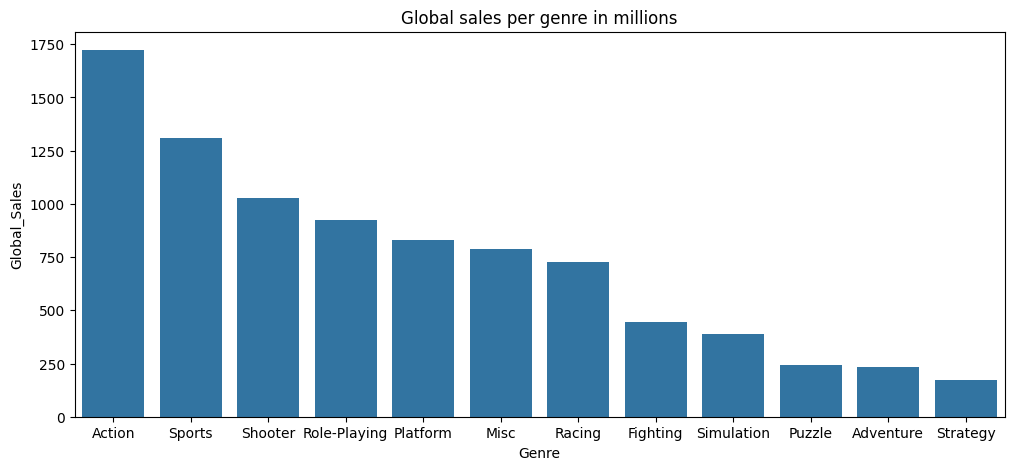

In [169]:
genre_sales = pd.DataFrame(video_game_sales.groupby(by='Genre')['Global_Sales'].sum()).reset_index()
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(data=genre_sales, x='Genre', y='Global_Sales')

plt.title('Global sales per genre in millions')

plt.show()


3.   Sales Trends Over Time:
      - How have global video game sales evolved over the years?
      - What are the sales trends for each platform over time?

4.   Regional Sales Analysis:
      - Which regions have the highest sales for specific genres?
      - How do regional sales compare for the top 10 publishers?

5.   Publisher Performance:
      - Which publishers have the highest global sales?
      - How do the sales of games from different publishers compare in various regions?

6.   Platform Comparison:
      - Which platform has the highest overall sales?
      - How do the sales of games for different platforms compare in various regions?

7.   Yearly Sales Analysis:
      - Which year had the highest global video game sales?
      - How do sales in each region vary year by year?

8.   Correlation Analysis:
      - Is there a correlation between sales in different regions (e.g., NA_Sales vs. EU_Sales)?
      - How does the number of games released per year correlate with total sales?

9.   Top Publishers by Genre:
      - Which publishers are the top sellers in each genre?
      - How do the sales of publishers differ by genre in different regions?

10.  Impact of Release Year on Sales:
      - How does the release year affect the sales of video games?
      - Are newer games selling better than older ones?

11.  Game Count per Platform:
      - How many games are released for each platform?
      - How does the number of games released per platform change over the years?

12.  Average Sales per Game:
      - What is the average global sales per game for each platform?
      - How do average sales per game vary across different genres?

13.  Sales Distribution:
      - What is the distribution of sales (e.g., histogram) globally and regionally?
      - Are there outliers in the sales data?